**Question 1** [myknn_regressor]

K-nearest-neighbors (KNN) is a power method to construct nonparametric regression models. The goal of this question is to construct your own KNN regressor. To simplify the question, we are going to use the "brute-force" method to find nearest neighbors. That is, we are not going to use specialized data structures such as the K-D tree to speed up the process. Given a set of  N
  training data points and a pre-defined hyper-parameter k, the prediction for a testing data point  xa
  is computed by locating  k
  data points in the training data that is cloest to  xa
 . If the outcome values of the  k
  nearest neighbors are  ya={y1,y2,...,yk}
 , then the prediction is  f(ya)
 , where  f
  is a real-valued function. We are going to consider two possible choices of  f
 . The first option is  f(ya)=1/k∑ki=1yi.
  This is referred to as the "equal-weight" case. The other option is to compute the mean after removing outliers. We define outliers as the data points that are outside of  [Q1−1.5IQR,Q3+1.5IQR]
 , where  Q1
  and  Q3
  are the first and third quantile of  ya
 , and  IQR=Q3−Q1
 . Since quantiles and IQR only make sense when there are enough neighbors, we allow the "remove_outliers" only if  k>=10
 . If  k<10
 , use the "equal_weight"  f
  even if the user specify the other way.

Creat a Python class named myknn_regressor that can do predictions given training data and hyper-parameters. It should take the  k
  as the hyper-parameter for the number of neighbors. Moreover, the user can select  f
  by passing "equal_weight" or "remove_outliers" to switch between the two possible cases for  f
 .

The sample usage should be like the following:

myknn = myknn_regressor(20, "remove_outliers")

myknn.fit(X_train, Y_train)

ypred = myknn.predict(X_test)

The first line initiates an myknn_regressor object with  k=20
  and selected "remove_outliers" for  f
 ; the second line train the model and the third line computes prediction.

You are only allowed to use numpy in your own myknn_regressor class. You will receive a zero score if you adopted an existing KNN regressor such as those in scikit-learn. The input features and output predictions should be numpy arrays. If there is a tie in selecting neighbors, myknn_regressor should break the tie by choosing the data point that is located closer to the beginning of the training dataset.

**Dataset**

We are going to use a subset of the "Million Songs Dataset" in this question. The dataset has been pre-processed and the training and testing dataset has been splitted and stored in a dictionary data structure. You can load the data from from msd_data1.pickle using pickle.load(). There are four elements in the dictionary: x_train, y_train, x_test, y_test. As indicated by their names, these four elements are training and testing data. The outcome variable (i.e.  y
 ) is the year a song was released, and the features are variables that characterize the sound of a song. The goal is to predict the release year given sound features.

Answer the following questions:


**Q1.1** Create your myknn_regressor

In [ ]:
import numpy as np

In [ ]:
def pdt_y( norm_vec, y_train, k_value, function):
    # norm_vec : the norm of test data and the whole training data set
    # function : 2 types. equal_weight & remove_outliers(only available when k>=10)
    nearest_ys = np.zeros(k_value) # Store k nearest values
    y = y_train.copy()
    y_size = y.shape[0]
    norm = norm_vec.copy()

    for i in range( k_value ):
        m = norm.min() # Get the min value of norm (which means the nearest data point of test data)
        index = norm.argmin() # Get the index where min value appears
        # Store the y value and remove this data from the data set
        nearest_ys[i] = y[index]
        norm = np.delete(norm,index)
        y = np.delete(y,index)
    if function == "remove_outliers" and k_value >= 10 :
        y_Q1, y_Q3 = np.percentile(nearest_ys, [25, 75])
        y_IQR = y_Q3 - y_Q1
        l_bd = y_Q1 - 1.5*y_IQR
        u_bd = y_Q3 + 1.5*y_IQR
        nearest_ys = nearest_ys[(nearest_ys <= u_bd ) & (nearest_ys >= l_bd)] # Only left not outlier y
    # After above steps, we got complete nearest ys
    mean = nearest_ys.mean() #Take the mean and return the prediction value of y
    return mean

In [ ]:
class myknn_regressor:
    def __init__(self, K_value, f_outlier):
        self.k = K_value
        self.f = f_outlier

    def fit(self, x_train_set, y_train_set):
        self.x_train = x_train_set
        self.y_train = y_train_set

    def predict(self, x_test):
        self.x_test = x_test
        train_size = self.x_train.shape[0]
        norm_vec = np.zeros(train_size)
        test_size = self.x_test.shape[0]
        self.y_predict = np.zeros(test_size)
        # Iterate all data points in testing data
        for i in range(test_size):
            for j in range(train_size):
                # Build norm_vec array in where the L2 norm of test data point and the training data are stored
                norm_vec[j] = np.linalg.norm(self.x_test[i]-self.x_train[j])
            # Call pdt_y function to get the predicted y
            self.y_predict[i] = pdt_y(norm_vec, self.y_train, self.k, self.f)
        return self.y_predict

**Q1.2** Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. Make predictions using  $k$=20
  and "equal_weight"  $f$. List the RMSE and the first 20 predictions in the testing data.

In [ ]:
import pickle
with open('msd_data1.pickle', 'rb') as f:
    data = pickle.load(f)
data

{'X_train': array([[  53.39967,   56.67781,   55.63508, ...,    1.3159 ,    2.37448,
            1.85999],
        [  42.83464,  -33.90478,   38.97704, ...,    9.72827, -175.51446,
          -15.8389 ],
        [  49.88591,   23.30563,   54.79012, ...,    1.94152,  101.27241,
            8.99355],
        ...,
        [  41.04397,  -96.30727,   56.8073 , ...,    3.60251,  -97.24809,
           -5.80797],
        [  42.8676 ,   43.36365,   29.17957, ...,   18.71014,  208.9029 ,
          -11.08426],
        [  36.57558,   29.8733 ,   -3.08101, ...,   21.0417 ,  106.60317,
            3.44396]]),
 'Y_train': array([1996., 2001., 2003., ..., 2009., 1982., 1981.]),
 'X_test': array([[  38.51784,   55.38723,   10.31652, ...,    6.66624,  -73.75585,
            9.47857],
        [  44.7309 ,   46.25776,    8.55636, ...,    4.5564 ,   53.49956,
            5.39116],
        [  43.08912,   45.70197,   17.18467, ...,  -13.64909,   -7.42137,
           -4.97266],
        ...,
        [  39.81814

In [ ]:
# Store the data and check for the data size
x_train, y_train, x_test, y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5000, 90)
y_train shape: (5000,)
x_test shape: (3000, 90)
y_test shape: (3000,)


In [ ]:
#function for standardizing features and return the mean and standard deviation of each featur(column)
def standardize(ft_vec):
    row, col = ft_vec.shape
    std_ft_vec = ft_vec.copy()
    mean_std_vec = np.zeros((col,2))
    for c in range(col):
        col_vec = ft_vec[:,c]
        mean = col_vec.mean()
        std = np.std(col_vec)
        mean_std_vec[c][0],mean_std_vec[c][1] = mean, std
        std_ft_vec[:,c] = (ft_vec[:,c] - mean)/std
    return std_ft_vec, mean_std_vec

In [ ]:
# Standardize features
std_x_train,mean_std_vec = standardize(x_train)
std_x_test = np.zeros((3000,90))
for i in range (90):
    std_x_test[:,i] = ( x_test[:,i] - mean_std_vec[i][0])/(mean_std_vec[i][1])

In [ ]:
# Use myknn to train KNN model and get prediction
# Note that we use feature-standardized data here
myknn = myknn_regressor(20, "equal_weight")
myknn.fit( std_x_train, y_train)
y_pred1 = myknn.predict( std_x_test)

In [ ]:
# Calculate RMSE and print; and print the first 20 elements of y_prediction
test_size = y_test.shape[0]
RMSE1 =  np.sqrt(np.square( y_pred1 - y_test).mean())
print("RMSE of the test data is : ", RMSE1)
print("The first 20 elements of y_prediction are\n",y_pred1[:20])

RMSE of the test data is :  10.25126451549596
The first 20 elements of y_prediction are
 [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


**Q1.3**
Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  $k$=20
  and "remove_outier"  $f$ . List the RMSE and the first 20 predictions in the testing data.

In [ ]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit( std_x_train, y_train)
y_pred2 = myknn.predict( std_x_test)

In [ ]:
test_size = y_test.shape[0]
RMSE2 =  np.sqrt(np.square( y_pred2 - y_test).mean())
print("RMSE of the test data is : ", RMSE2)
print("The first 20 elements of y_prediction are\n",y_pred2[:20])

RMSE of the test data is :  10.212572466080376
The first 20 elements of y_prediction are
 [1993.35       1993.8        2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]


<font color = red>Conclusion: At $k$=20, RMSE decreased after outliers were removed, indicating that this method could help increase prediction accuracy.

**Question 2** [Tuning the Hyper-Parameter]

We are going to explore the issue of hyper-parameter tuning in this question. We are going to consider three cases in this question. Use the knn regressor from klearn.neighbors.KNeighborsRegressor for the first two cases, and your own myknn_regressor for the third cases.

For each case, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using  k=1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200
 . In the first case, all feature values are standardize to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case use standardized feature and adopted myknn_regressor with "remove_outlier"  f
  to make prediction.

For each case, plot a curve that shows the relations between  k
  (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure so that we can visually inspect their dynamics. Discuss your observations.


<font color = blue> Case 1 : Use sklearn.neighbors.KNeighborsRegressor and standardized features for KNN prediction

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
print("RMSE in the testing data using sklearn.neighbors.KNeighborsRegressor and standardized feature values : ")
RMSE_case1 = np.zeros(22)
k_seq = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,200]
test_size = y_test.shape[0]
index = 0
for i in k_seq:
    KNNreg = KNeighborsRegressor(n_neighbors=i)
    KNNreg.fit(std_x_train, y_train)
    y_pred_KNNreg1 = KNNreg.predict( std_x_test )

    RMSE_case1[index] = np.sqrt(np.square( y_pred_KNNreg1 - y_test).mean())
    print("RMSE when K = ",i ," is ", RMSE_case1[index])
    index += 1

RMSE in the testing data using sklearn.neighbors.KNeighborsRegressor and standardized feature values : 
RMSE when K =  1  is  13.911074724837043
RMSE when K =  2  is  12.068170946750795
RMSE when K =  3  is  11.389120864846157
RMSE when K =  4  is  11.1123354880961
RMSE when K =  5  is  10.894692897614565
RMSE when K =  10  is  10.425998912973919
RMSE when K =  15  is  10.318171959828572
RMSE when K =  20  is  10.25126451549596
RMSE when K =  25  is  10.23762722509469
RMSE when K =  30  is  10.215977156359507
RMSE when K =  35  is  10.205243203546763
RMSE when K =  40  is  10.204332770527754
RMSE when K =  45  is  10.207243171822855
RMSE when K =  50  is  10.206033712139762
RMSE when K =  55  is  10.208862384446808
RMSE when K =  60  is  10.21700262724764
RMSE when K =  80  is  10.231954198429056
RMSE when K =  100  is  10.247295947386965
RMSE when K =  120  is  10.264908458982783
RMSE when K =  140  is  10.287098382403647
RMSE when K =  160  is  10.317788599090449
RMSE when K =  200  

<font color = blue> Case 2 : Use sklearn.neighbors.KNeighborsRegressor and unstandardized features for KNN prediction

In [ ]:
print("RMSE in the testing data using sklearn.neighbors.KNeighborsRegressor and unstandardized feature values : ")
RMSE_case2 = np.zeros(22)
index = 0
for i in k_seq:
    KNNreg = KNeighborsRegressor(n_neighbors=i)
    KNNreg.fit(x_train, y_train)
    y_pred_KNNreg2 = KNNreg.predict( x_test )
    #print(y_pred_KNNreg1)

    RMSE_case2[index] = np.sqrt(np.square( y_pred_KNNreg2 - y_test).mean())
    print("RMSE when K = ",i ," is ", RMSE_case2[index])
    index += 1

RMSE in the testing data using sklearn.neighbors.KNeighborsRegressor and unstandardized feature values : 
RMSE when K =  1  is  14.923638966418345
RMSE when K =  2  is  12.777499755429464
RMSE when K =  3  is  12.075674967716129
RMSE when K =  4  is  11.767805657810635
RMSE when K =  5  is  11.466392632384432
RMSE when K =  10  is  11.07746090040493
RMSE when K =  15  is  10.888979137947995
RMSE when K =  20  is  10.797788546734928
RMSE when K =  25  is  10.79007301797969
RMSE when K =  30  is  10.75026561256701
RMSE when K =  35  is  10.717738719772289
RMSE when K =  40  is  10.714437504678756
RMSE when K =  45  is  10.698494013475852
RMSE when K =  50  is  10.69110105960404
RMSE when K =  55  is  10.682608734124413
RMSE when K =  60  is  10.672535729098724
RMSE when K =  80  is  10.662907517124493
RMSE when K =  100  is  10.67701950452466
RMSE when K =  120  is  10.683139638996407
RMSE when K =  140  is  10.687017556442052
RMSE when K =  160  is  10.691630026202155
RMSE when K =  200

<font color = blue> Case 3 : Use myknn regressor in Question 1 and standardized features for KNN prediction

In [ ]:
print("RMSE in the testing data using myknn regressor and standardized feature values : ")
RMSE_case3 = np.zeros(22)
index = 0
for i in k_seq:
    myknn3 = myknn_regressor(i, "remove_outliers")
    myknn3.fit( std_x_train, y_train)
    y_pred_myknn3 = myknn3.predict( std_x_test)
    #print(y_pred_KNNreg3)

    RMSE_case3[index] = np.sqrt(np.square( y_pred_myknn3 - y_test).mean())
    print("RMSE when K = ",i ," is ", RMSE_case3[index])
    index += 1

RMSE in the testing data using myknn regressor and standardized feature values : 
RMSE when K =  1  is  13.911074724837043
RMSE when K =  2  is  12.068170946750795
RMSE when K =  3  is  11.389120864846157
RMSE when K =  4  is  11.1123354880961
RMSE when K =  5  is  10.894692897614565
RMSE when K =  10  is  10.468549209697088
RMSE when K =  15  is  10.293424167991525
RMSE when K =  20  is  10.212572466080376
RMSE when K =  25  is  10.19147537897133
RMSE when K =  30  is  10.132105705172414
RMSE when K =  35  is  10.109608004792985
RMSE when K =  40  is  10.093231539122922
RMSE when K =  45  is  10.080018891479627
RMSE when K =  50  is  10.08078333324933
RMSE when K =  55  is  10.059767600751963
RMSE when K =  60  is  10.073857809066583
RMSE when K =  80  is  10.063683549276588
RMSE when K =  100  is  10.064917276737452
RMSE when K =  120  is  10.067237203620246
RMSE when K =  140  is  10.090646192390137
RMSE when K =  160  is  10.115316675702928
RMSE when K =  200  is  10.14622072022774

<font color = blue> Use matplotlib.pyplot to demonstrate three cases.

In [ ]:
import matplotlib.pyplot as plt

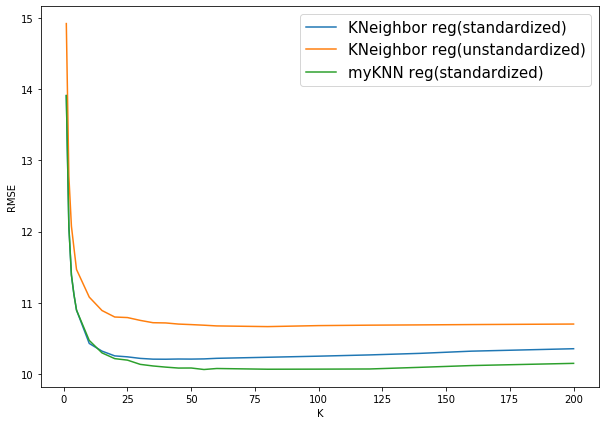

In [ ]:
x = k_seq
y1, y2, y3 = RMSE_case1, RMSE_case2, RMSE_case3
plt.figure(figsize=(10,7))
plot = plt.plot(x,y1, label = 'KNeighbor reg(standardized)')
plot = plt.plot(x,y2, label = 'KNeighbor reg(unstandardized)')
plot = plt.plot(x,y3, label = 'myKNN reg(standardized)')
plt.legend(loc = 'upper right',prop = {'size':15})
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

**<font color = red> Conclusion :**    
    
We can observe two findings from the plot above:     
    
(1) **Feature standardization is important** :   
Regardless of k value, RMSE is higher when using unstandardized features for prediction in comparison to the other two cases. This indicates that the magnitudes of some features can vary a lot, resulting in different influences when calculating the distance in RMSE, which further impacts the prediction accuracy. Therefore, we can conclude that feature standardization is essential when making knn prediction to aviod modeling bias.

    
(2) **Removing outliers can effectively improve prediction accuracy** :   
  When $k$ <10, RMSE in case 1 and case 3 are identical. When $k$=10, myknn regressor performed a bit worse than KNeighbot, but when $k$>10, myknn regressor performed much better than KNeighbor regressor. The differences should come from how we address outliers.We can conclude that when properly removing outliers, we can get better performance in predictions.